#Group - 9

##Anju Venkiteswaran 25PGAI0005

##Anshuman Jha 25PGAI0022

##Rahil Bhensdadia 25PGAI0001

##Rushi Varmora 25PGAI0142

**Description:**

The objective of the dataset is to predict whether or not Customer will be approved for a loan he/she requests,based on certain parametersincluded in the dataset.

#  Import libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
file_path = 'loan_approval_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [ ]:
df.tail()

loan_id   no_of_dependents      education  self_employed   income_annum  \
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [ ]:
df.shape

(4269, 13)

In [ ]:
# To remove the white spaces
df.columns = df.columns.str.strip()

#Understanding the data

In [ ]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [ ]:
##check for null values
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [ ]:
# Count of null values
df.isnull().sum().sum()

0

In [ ]:
# To find NA values
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

#Descriptive Statistics

In [ ]:
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [ ]:
df.describe()

loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06             4.388966e+06   
min     300.000000             -1.000000e+05             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       luxury_assets_value  bank_asset_value  
count         4.269000e+03      4.269000e+03  
mean          1.512631e+07      4.976692e+06  
std           9.103754e+06      3.250185e+06  
min           3.000000e+05      0.000000e+00  
25%           7.500000e+06      2.300000e+06  
50%           1.460000e+07      4.600000e+06  
75%           2.170000e+07      7.100000e+06  
max           3.920000e+07      1.470000e+07

In [ ]:
# Statistical summary
df.describe().T

count          mean           std       min  \
loan_id                   4269.0  2.135000e+03  1.232498e+03       1.0   
no_of_dependents          4269.0  2.498712e+00  1.695910e+00       0.0   
income_annum              4269.0  5.059124e+06  2.806840e+06  200000.0   
loan_amount               4269.0  1.513345e+07  9.043363e+06  300000.0   
loan_term                 4269.0  1.090045e+01  5.709187e+00       2.0   
cibil_score               4269.0  5.999361e+02  1.724304e+02     300.0   
residential_assets_value  4269.0  7.472617e+06  6.503637e+06 -100000.0   
commercial_assets_value   4269.0  4.973155e+06  4.388966e+06       0.0   
luxury_assets_value       4269.0  1.512631e+07  9.103754e+06  300000.0   
bank_asset_value          4269.0  4.976692e+06  3.250185e+06       0.0   

                                25%         50%         75%         max  
loan_id                      1068.0      2135.0      3202.0      4269.0  
no_of_dependents                1.0         3.0         4.0         5.0  
income_annum              2700000.0   5100000.0   7500000.0   9900000.0  
loan_amount               7700000.0  14500000.0  21500000.0  39500000.0  
loan_term                       6.0        10.0        16.0        20.0  
cibil_score                   453.0       600.0       748.0       900.0  
residential_assets_value  2200000.0   5600000.0  11300000.0  29100000.0  
commercial_assets_value   1300000.0   3700000.0   7600000.0  19400000.0  
luxury_assets_value       7500000.0  14600000.0  21700000.0  39200000.0  
bank_asset_value          2300000.0   4600000.0   7100000.0  14700000.0

## Observations:
1. There are a total of 4269 Records and  13 columns in the dataset.
2. Each feature can be either of Integer and object dataype.
3. No missing values present
4. There are  NaN values in the dataset.

#Data Visualization

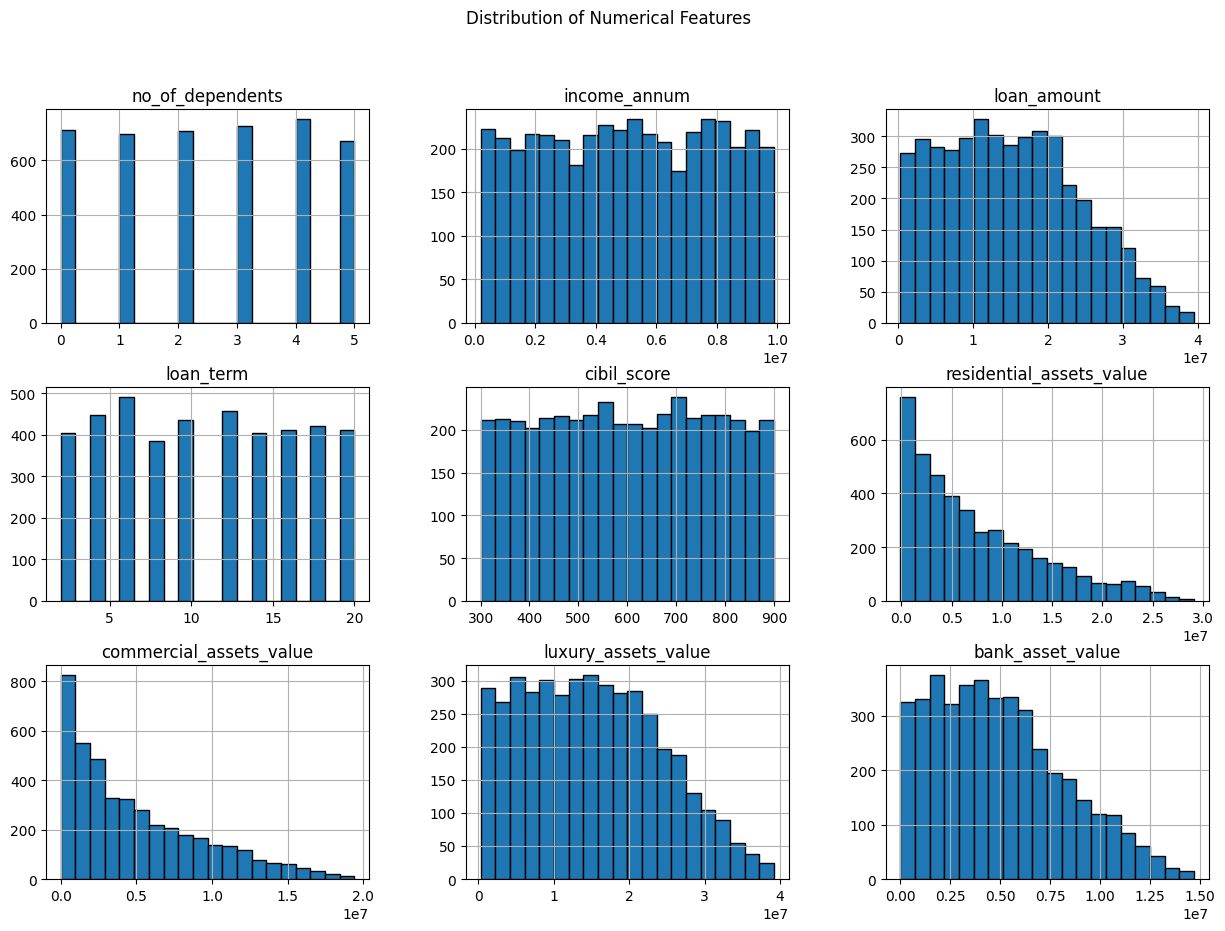

In [ ]:
# Histogram of each feature
numerical_features = ['no_of_dependents', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', ]
df[numerical_features].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()


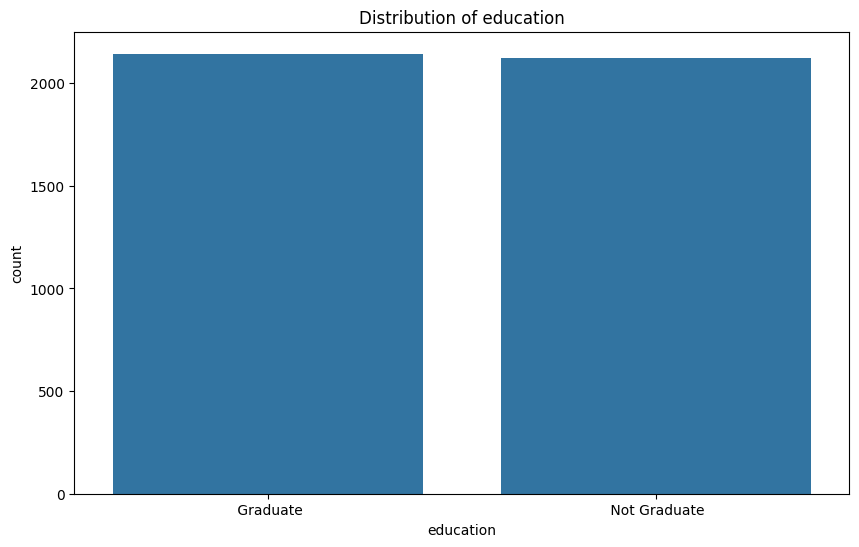

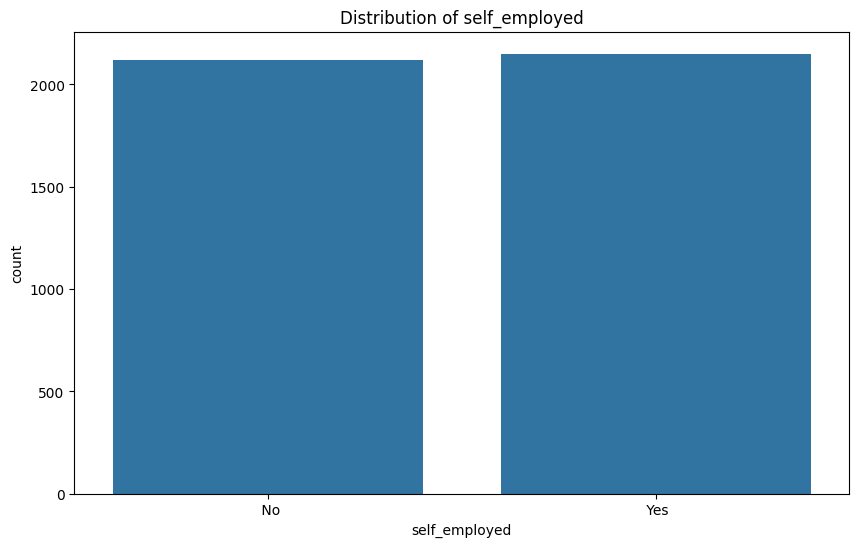

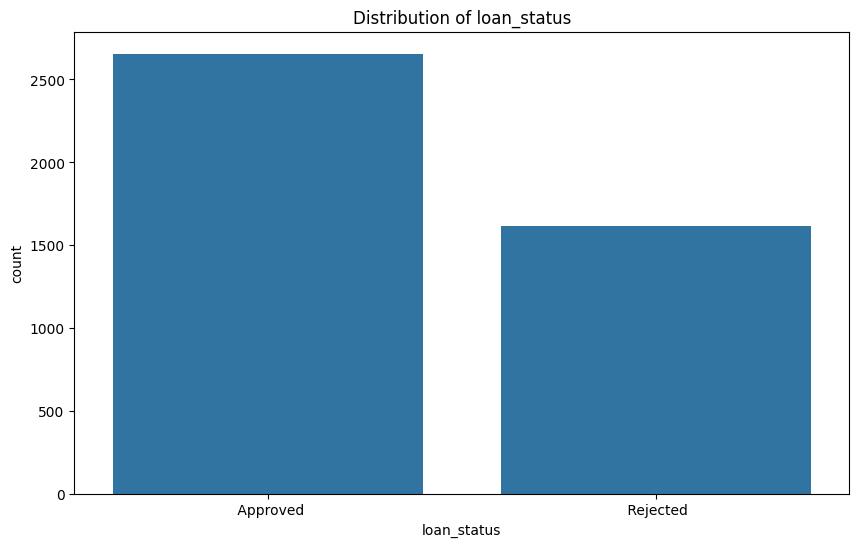

In [ ]:

categorical_features = [ 'education', 'self_employed', 'loan_status']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

Outlier Detection

<Axes: >

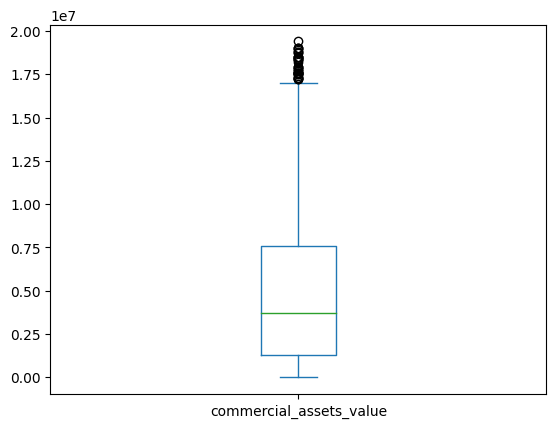

In [ ]:
df['commercial_assets_value'].plot(kind='box')

<Axes: >

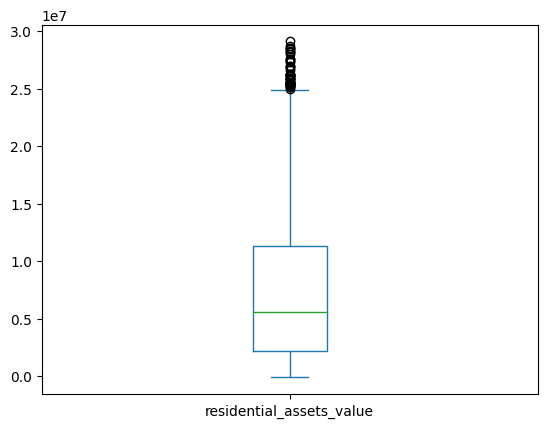

In [ ]:
df['residential_assets_value'].plot(kind='box')

<Axes: >

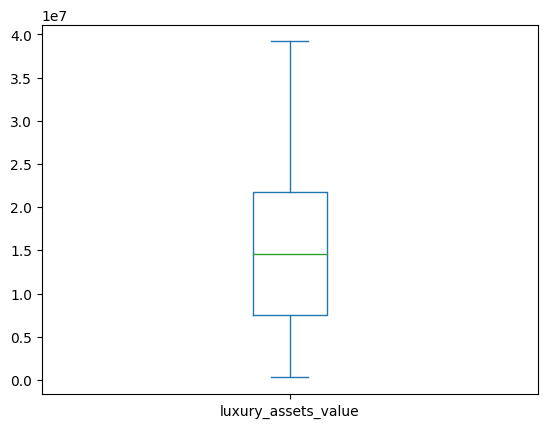

In [ ]:
df['luxury_assets_value'].plot(kind='box')

<Axes: >

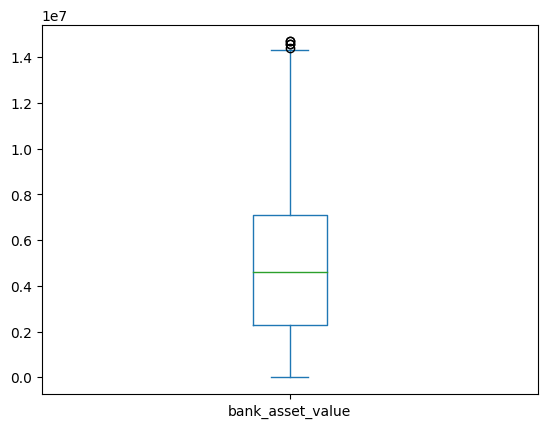

In [ ]:
df['bank_asset_value'].plot(kind='box')

#Data Transformation

In [ ]:
df['education'] = df['education'].str.strip().str.lower()
df['self_employed'] = df['self_employed'].str.strip().str.lower()
df['loan_status'] = df['loan_status'].str.strip().str.lower()

df['education'] = df['education'].apply(lambda x: 1 if x == 'graduate' else 0)
df['self_employed'] = df['self_employed'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'approved' else 0)

In [ ]:
for col in ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']:
    df[col] = df[col].apply(lambda x: max(x, 0))

In [ ]:
df.head()

loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1                 2          1              0       9600000   
1        2                 0          0              1       4100000   
2        3                 3          1              0       9100000   
3        4                 3          1              0       8200000   
4        5                 5          0              1       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                 17600000             22700000           8000000            1  
1                  2200000              8800000           3300000            0  
2                  4500000             33300000          12800000            0  
3                  3300000             23300000           7900000            0  
4                  8200000             29400000           5000000            0

#Data Vizualization continued

<Axes: ylabel='Frequency'>

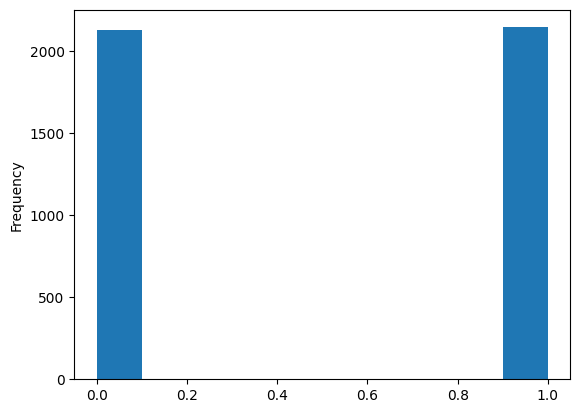

In [ ]:
df['education'].plot(kind='hist')

<Axes: ylabel='Frequency'>

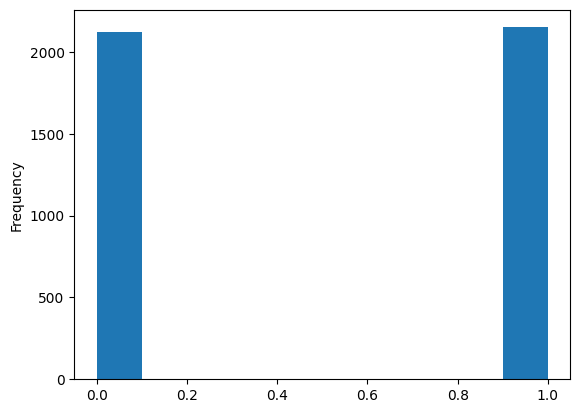

In [ ]:
df['self_employed'].plot(kind='hist')

<Axes: ylabel='Frequency'>

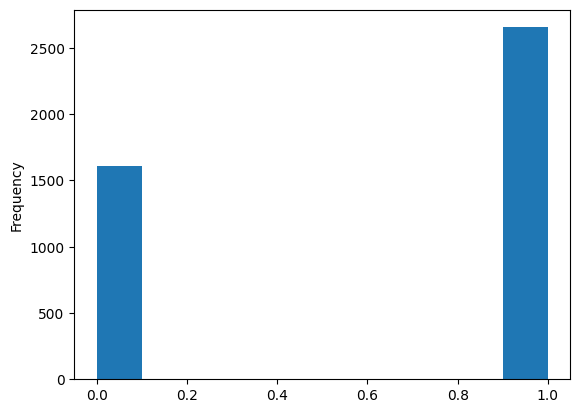

In [ ]:
df['loan_status'].plot(kind='hist')

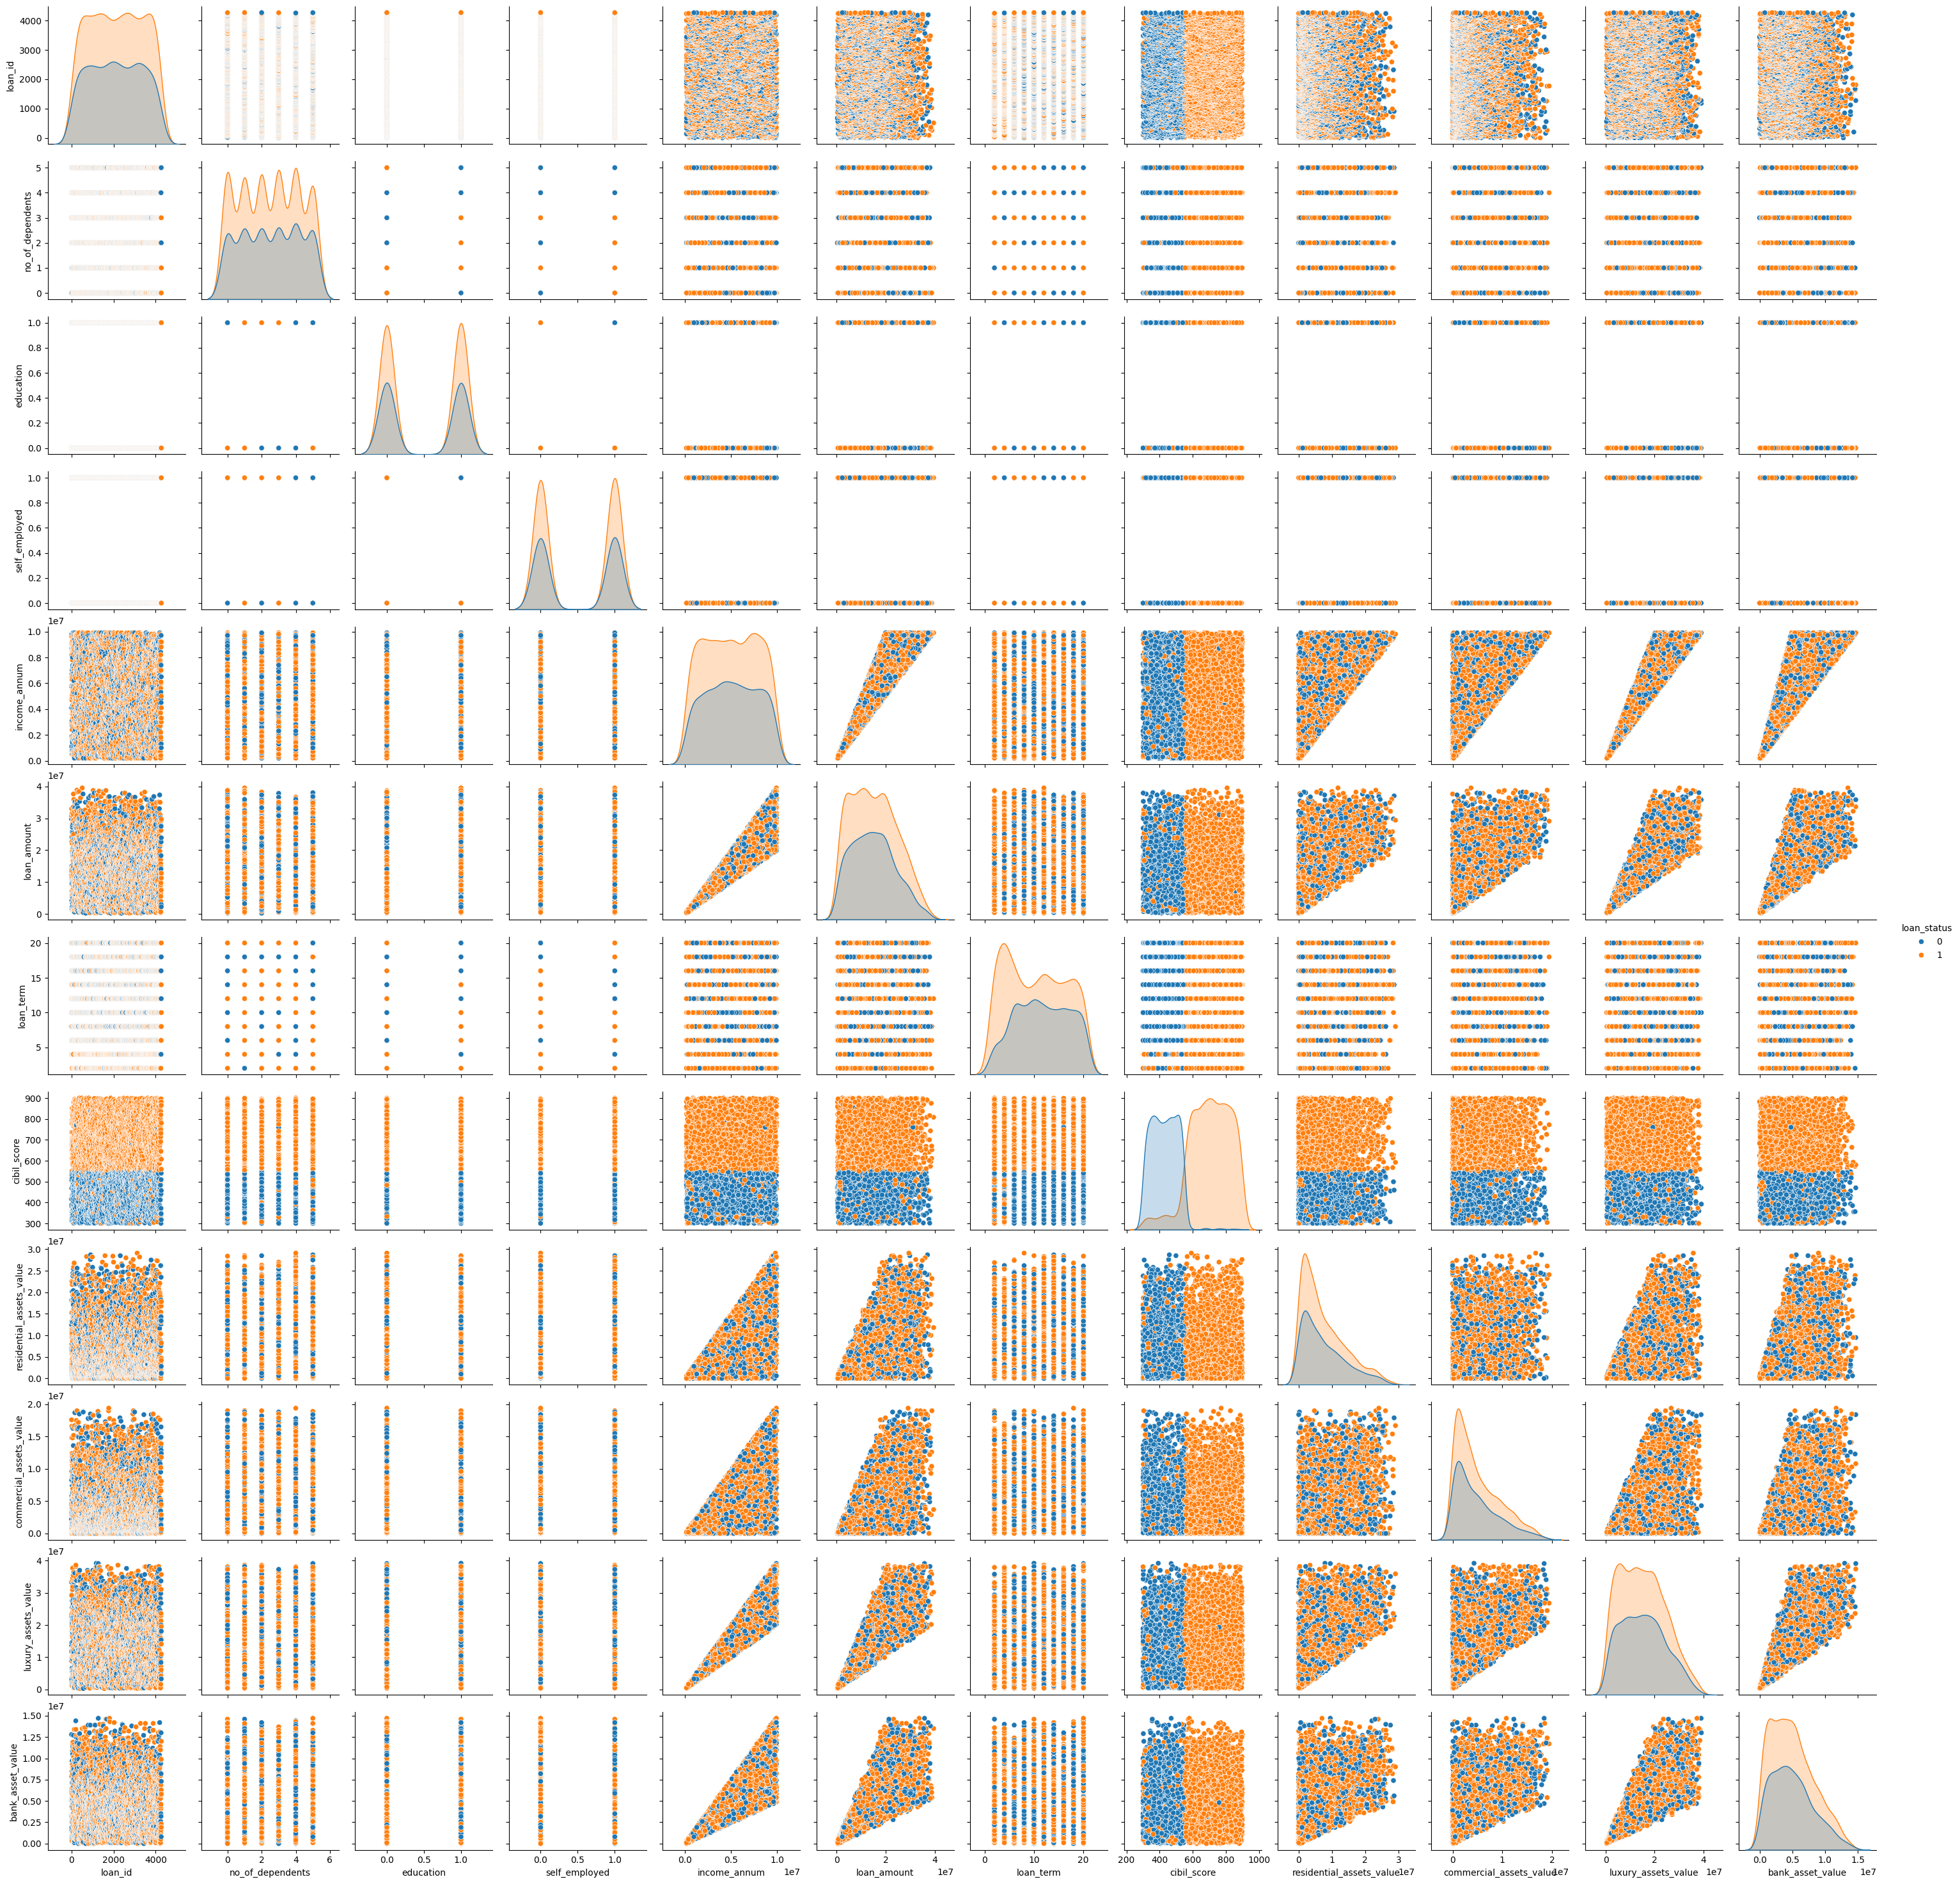

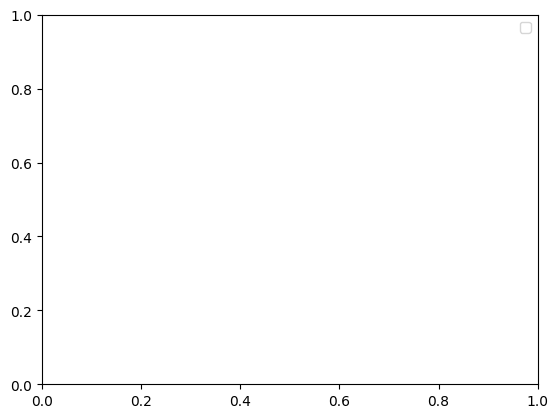

In [ ]:
 ##Pairplot
sns.pairplot(data = df, hue = 'loan_status')
plt.show()
plt.legend()

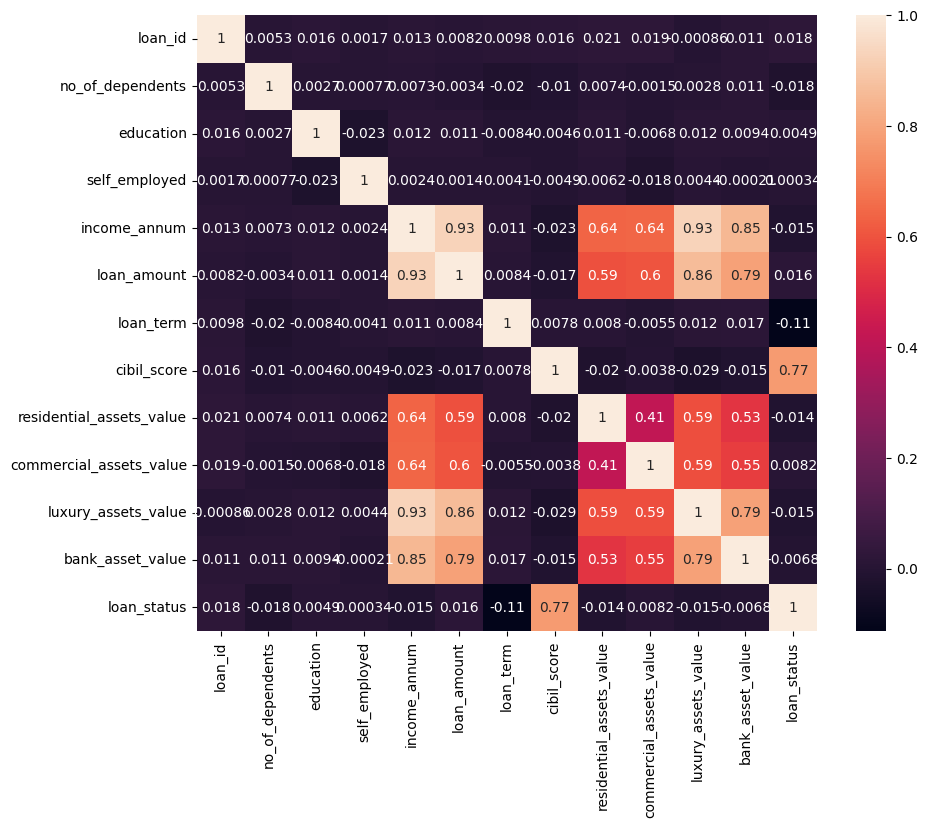

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

###High correlation between - income_annum , luxury_asset_value, bank_asset_value and loan_amount ,so we can reduce the features and drop the columns/features bank_asset_value and luxury_asset_value and keep income_annum and loan_amount as they are important features.

# Model Training and Evaluation

In [ ]:
# Separate features and target
X = df.drop(columns=['loan_status','luxury_assets_value','bank_asset_value'])
y = df['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

# Evaluate Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.77      0.46      0.57       318
           1       0.74      0.92      0.82       536

    accuracy                           0.75       854
   macro avg       0.75      0.69      0.70       854
weighted avg       0.75      0.75      0.73       854

[[146 172]
 [ 44 492]]


In [ ]:
# Decision Tree
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

[[306  12]
 [  9 527]]


In [ ]:
# Random Forest
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

[[305  13]
 [  4 532]]


In [ ]:
# k-Nearest Neighbors (k-NN)
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

# Evaluate k-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'k-Nearest Neighbors (k-NN) Accuracy: {accuracy_knn:.2f}')
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

k-Nearest Neighbors (k-NN) Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.35      0.28      0.31       318
           1       0.62      0.70      0.66       536

    accuracy                           0.54       854
   macro avg       0.49      0.49      0.48       854
weighted avg       0.52      0.54      0.53       854

[[ 88 230]
 [160 376]]


In [ ]:
# Naive Bayes
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)

# Evaluate Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.90      0.42      0.57       318
           1       0.74      0.97      0.84       536

    accuracy                           0.77       854
   macro avg       0.82      0.70      0.70       854
weighted avg       0.80      0.77      0.74       854

[[133 185]
 [ 15 521]]


In [ ]:
# Support Vector Machines (SVM)
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

# Evaluate SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Support Vector Machines (SVM) Accuracy: {accuracy_svm:.2f}')
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

Support Vector Machines (SVM) Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       318
           1       0.63      1.00      0.77       536

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854

[[  0 318]
 [  0 536]]


In [ ]:
'''
# Gradient Boosting Machines (GBM)
clf_gbm = GradientBoostingClassifier()
clf_gbm.fit(X_train, y_train)
y_pred_gbm = clf_gbm.predict(X_test)

# Evaluate GBM
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f'Gradient Boosting Machines (GBM) Accuracy: {accuracy_gbm:.4f}')
print(classification_report(y_test, y_pred_gbm))
print(confusion_matrix(y_test, y_pred_gbm))
'''

"\n# Gradient Boosting Machines (GBM)\nclf_gbm = GradientBoostingClassifier()\nclf_gbm.fit(X_train, y_train)\ny_pred_gbm = clf_gbm.predict(X_test)\n\n# Evaluate GBM\naccuracy_gbm = accuracy_score(y_test, y_pred_gbm)\nprint(f'Gradient Boosting Machines (GBM) Accuracy: {accuracy_gbm:.4f}')\nprint(classification_report(y_test, y_pred_gbm))\nprint(confusion_matrix(y_test, y_pred_gbm))\n"

In [ ]:
# Collect results in a dictionary
results = {
    'Logistic Regression': accuracy_lr,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'k-Nearest Neighbors (k-NN)': accuracy_knn,
    'Naive Bayes': accuracy_nb,
    'Support Vector Machines (SVM)': accuracy_svm,
    #'Gradient Boosting Machines (GBM)': accuracy_gbm
}

# Create a DataFrame to display the results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df['Rank'] = results_df['Accuracy'].rank(ascending=False)
best_model = results_df['Accuracy'].idxmax()

#Model Comparison

In [ ]:
# Display the results
print(results_df)
print(f'The best model is {best_model} with an accuracy of {results[best_model]:.4f}')

                               Accuracy  Rank
Logistic Regression            0.747073   4.0
Decision Tree                  0.975410   2.0
Random Forest                  0.980094   1.0
k-Nearest Neighbors (k-NN)     0.543326   6.0
Naive Bayes                    0.765808   3.0
Support Vector Machines (SVM)  0.627635   5.0
The best model is Random Forest with an accuracy of 0.9801


#Hyperparameter tuning for Random Forest

In [ ]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=2, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Best Random Forest Accuracy: {accuracy_best_rf:.4f}')
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))


Fitting 2 folds for each of 648 candidates, totalling 1296 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Accuracy: 0.9824
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

[[308  10]
 [  5 531]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the randomized search model
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Display the best parameters
print(f'Best Parameters: {random_search.best_params_}')

# Evaluate the best model
best_rf2 = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Best Random Forest Accuracy: {accuracy_best_rf:.4f}')
print(classification_report(y_test, y_pred_best_rf))
print(confusion_matrix(y_test, y_pred_best_rf))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Best Random Forest Accuracy: 0.9824
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

[[308  10]
 [  5 531]]


In [ ]:
import joblib

# Save the best model
joblib.dump(best_rf2, 'best_random_forest_model.pkl')
print("Best Random Forest model saved as 'best_random_forest_model.pkl'")


Best Random Forest model saved as 'best_random_forest_model.pkl'


In [ ]:
# Summary of the best model
summary = {
    'Best Parameters': random_search.best_params_,
    'Best Accuracy': accuracy_best_rf,
    'Classification Report': classification_report(y_test, y_pred_best_rf, output_dict=True),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_best_rf).tolist()
}

# Save the summary as a JSON file
import json
with open('model_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print("Model summary saved as 'model_summary.json'")


Model summary saved as 'model_summary.json'


In [ ]:
# Load the saved model
loaded_model = joblib.load('best_random_forest_model.pkl')

# Example usage: Predict on new data
new_data = X_test.iloc[:5]  # Replace with your new data
predictions = loaded_model.predict(new_data)

print("Predictions for new data:")
print(predictions)


Predictions for new data:
[0 1 0 1 1]
